In [168]:
import pandas as pd
import numpy as np
import re

Energy = pd.read_excel('Energy Indicators.xls')

# Delete unnecesary columns and rows
Energy.drop(columns=['Unnamed: 0', 'Unnamed: 1'], inplace=True)
Energy.drop(Energy.index[0:17], inplace=True)
Energy.drop(Energy.index[227:], inplace=True)

# Formating the data. Use good column names and number units.
Energy.rename(columns={
    'Unnamed: 2': 'Country',
    'Unnamed: 3': 'Energy Supply',
    'Unnamed: 4': 'Energy Supply per Capita',
    'Unnamed: 5': '% Renewable'
}, inplace=True)
Energy.replace({'...': np.nan}, inplace=True)
Energy['Energy Supply'] = Energy['Energy Supply']*1000000

# Fomatting countries names:
# Bolivia (Plurinational State of) -> Bolivia
# Spain16 -> Spain
def proccess_regex(pattern, row):
    result = re.findall(pattern, row)
    if result:
        return result[0]
    return row

Energy['Country'] = Energy['Country'].apply(
    lambda x: proccess_regex('([\w\s]+)(?:\ {1}\(.*\))', x)
)
Energy['Country'] = Energy['Country'].apply(
    lambda x: proccess_regex('([a-zA-Z\s\,]+)(?:\d+)', x)
)

Energy.replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}, inplace=True)

# World bank datadrame
GDP = pd.read_csv('world_bank.csv')
GDP.drop(GDP.index[0:3], inplace=True)
GDP.rename(columns=GDP.iloc[0], inplace=True)
GDP.drop(GDP.index[0], inplace=True)
GDP.replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}, inplace=True)
cols = list(GDP.columns)
GDP.columns = cols[0:4] + [str(int(x)) for x in cols[4:]]
GDP.reset_index(inplace=True, drop=True)
GDP.rename(columns={'Country Name': 'Country'}, inplace=True)


ScimEn = pd.read_excel("scimagojr-3.xlsx")
# I can merge because both dataframe have a common column named Country
# if not an error is displayed
# No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False
j1 = pd.merge(ScimEn, Energy)
j2_ = pd.merge(j1, GDP)

# Return the top 15 countries
j2 = j2_[0:15]
columns = [
    'Country', 'Rank', 'Documents', 'Citable documents', 'Citations',
    'Self-citations', 'Citations per document', 'H index',
    'Energy Supply', 'Energy Supply per Capita', '% Renewable',
    '2006', '2007', '2008', '2009', '2010', '2011', '2012',
    '2013', '2014', '2015'
]
j2 = j2[columns]
j2.set_index('Country', inplace = True)
j2


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [169]:
merge_1 = pd.merge(ScimEn,Energy)
merge_1 = pd.merge(merge_1, GDP)
merge_1.set_index('Country', inplace = True)

merge_2 = pd.merge(ScimEn,Energy, how="outer")
merge_3 = pd.merge(merge_2, GDP, how="outer")
merge_3.set_index('Country', inplace = True)

diff = merge_3.shape[0] - merge_1.shape[0]
diff

158

### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [170]:
ng = np.arange(10,20)
dat = j2.columns[ng]
avgGDP = j2[dat].mean(axis=1).sort_values(ascending=False)
avgGDP

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [171]:
sixth = j2.loc['United Kingdom']
(sixth['2015'] - sixth['2006'])

246702696075.3999

### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [172]:
j2['Energy Supply per Capita'].mean()

157.6

### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [173]:
max_ren = j2['% Renewable'].max()
ind = j2.index[j2['% Renewable'] == max_ren][0]
ind, max_ren

('Brazil', 69.64803)

### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [174]:
j2['ratio'] = j2['Self-citations'] / j2['Citations']
max_ratio = j2['ratio'].sort_values(ascending=False).iloc[[0]]
max_ratio.index[0], max_ratio[0]

('China', 0.6893126179389422)

### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the **third** most populous country according to this estimate?

*This function should return the name of the country*

In [175]:
Top15 = j2.copy()
Top15['pop'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
dpop = Top15['pop'].sort_values(ascending=False)[2]
py = Top15.index[Top15['pop'] == dpop][0]
py

'United States'

### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [176]:
Top15 = j2.copy()
Top15['pop'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['citable_docs_per_capita'] = Top15['Citable documents'] / Top15['pop']
correlation = Top15['citable_docs_per_capita'].corr(Top15['Energy Supply per Capita'])
correlation

0.7940010435442946

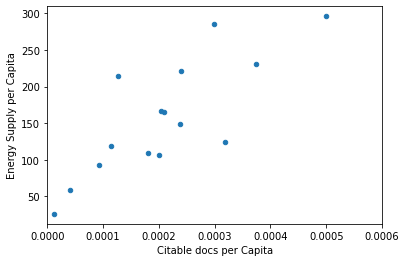

In [177]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = j2.copy()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
plot9()

### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [178]:
Top15 = j2.copy()
Top15['HighRenew'] = Top15['% Renewable']
median_ = j2['% Renewable'].median()
Top15['HighRenew'].apply(lambda x: 1 if x >= median_ else 0)


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [179]:
ContinentDict  = {'China':'Asia', 
                'United States':'North America', 
                'Japan':'Asia', 
                'United Kingdom':'Europe', 
                'Russian Federation':'Europe', 
                'Canada':'North America', 
                'Germany':'Europe', 
                'India':'Asia',
                'France':'Europe', 
                'South Korea':'Asia', 
                'Italy':'Europe', 
                'Spain':'Europe', 
                'Iran':'Asia',
                'Australia':'Australia', 
                'Brazil':'South America'}

Top15 = j2.copy().reset_index()
Top15['pop'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Continent'] = Top15['Country'].apply(lambda x: ContinentDict[x])
Top15 = Top15[['Country', 'Continent', 'pop']]
result = Top15.groupby('Continent')[['Country']].count()
result['sum'] = Top15.groupby('Continent')['pop'].sum()
result['mean'] = Top15.groupby('Continent')['pop'].mean()
result['std'] = Top15.groupby('Continent')['pop'].std()
result = result.reset_index().set_index('Continent')
result

,Country,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [180]:
ContinentDict  = {'China':'Asia', 
                'United States':'North America', 
                'Japan':'Asia', 
                'United Kingdom':'Europe', 
                'Russian Federation':'Europe', 
                'Canada':'North America', 
                'Germany':'Europe', 
                'India':'Asia',
                'France':'Europe', 
                'South Korea':'Asia', 
                'Italy':'Europe', 
                'Spain':'Europe', 
                'Iran':'Asia',
                'Australia':'Australia', 
                'Brazil':'South America'}

j = 0
Top15 = j2.copy()
Top15['Continent'] = None
for v in ContinentDict.values():
    Top15['Continent'].iloc[j] = v
    j += 1
Top15['% Renewable'] = pd.cut(Top15['% Renewable'],bins=5)
new_renou = Top15.groupby(['Continent','% Renewable']).size()
new_renou

/home/manjaro/Documentos/experientos/env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64

### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [181]:
Top15 = j2.copy()
Top15['pop'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['PopEst'] = Top15['pop'].map('{:,}'.format)

Top15['PopEst']

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object